In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Data/kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.drop(columns=['id', 'zipcode', 'lat', 'long'], inplace=True)

In [5]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503


In [8]:
data.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_built          116
yr_renovated       70
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [9]:
data.shape

(21597, 17)

In [10]:
data.dropna().shape

(15762, 17)

In [11]:
data.shape

(21597, 17)

In [12]:
data.isna().sum().sum()

6281

In [13]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,-0.000247,0.003852
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.731767,0.326377,-0.000247,1.000000,0.183515


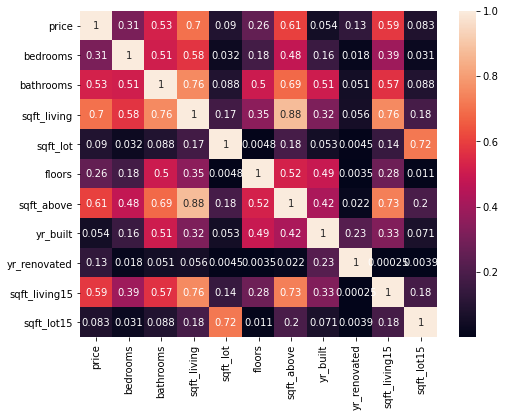

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [15]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,True,False,False,False,False,False,True,False


In [16]:
df1 = data.drop(columns='price')

df1 = df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.7) & (df1.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot, sqft_lot15)",0.718204


In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year

In [19]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'month', 'year'],
      dtype='object')

In [20]:
data.drop(columns='date', inplace=True)

price : 78000.0 450000.0 7700000.0


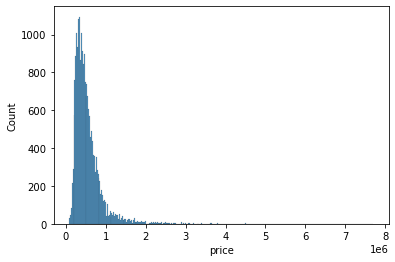

bedrooms : 1 3.0 33


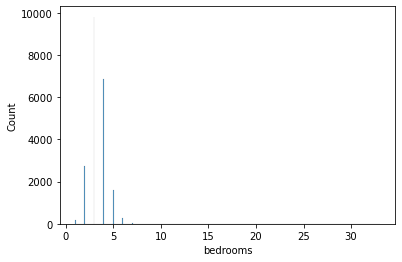

bathrooms : 0.5 2.25 8.0


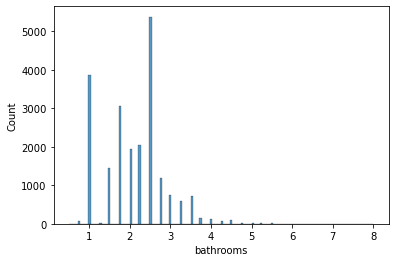

sqft_living : 370 1910.0 13540


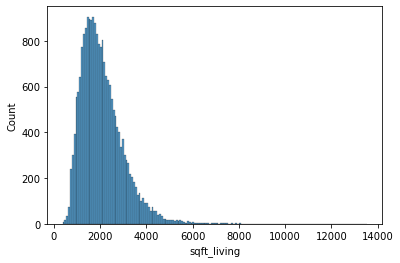

sqft_lot : 520 7618.0 1651359


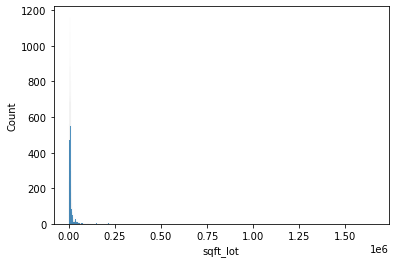

floors : 1.0 1.5 3.5


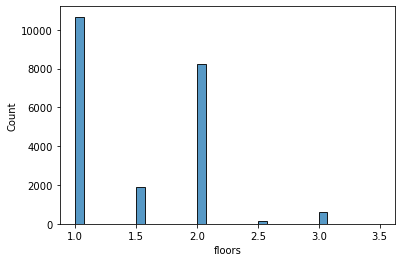

sqft_above : 370 1560.0 9410


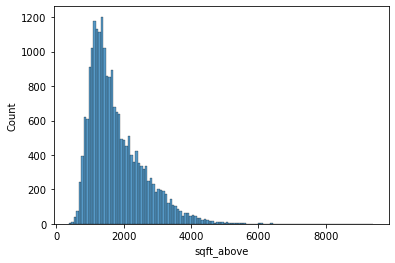

yr_built : 1900 1975.0 2015


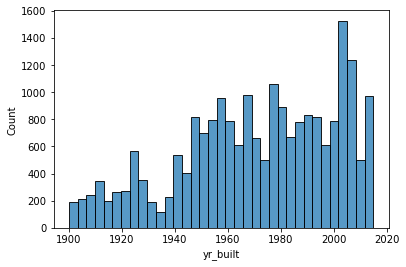

yr_renovated : 0.0 0.0 2015.0


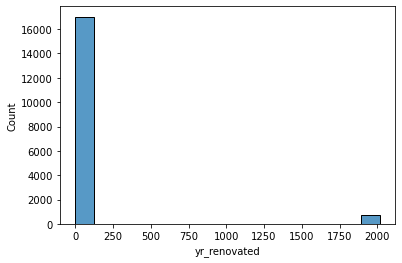

sqft_living15 : 399 1840.0 6210


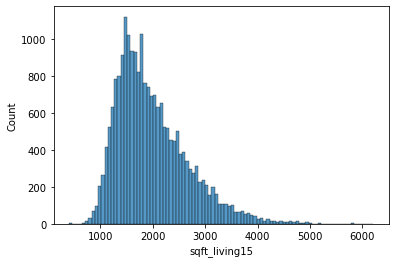

sqft_lot15 : 651 7620.0 871200


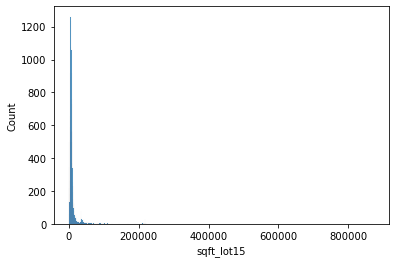

month : 1 6.0 12


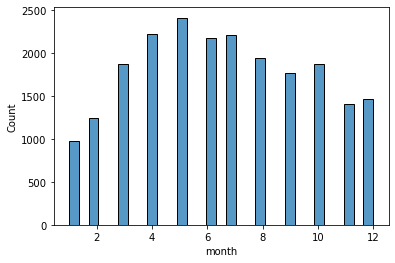

year : 2014 2014.0 2015


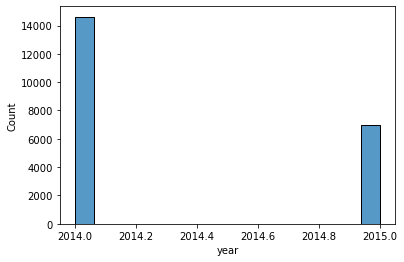

In [21]:
for col in data.columns:
    if data[col].dtype != 'object':
        print(col, ':', data[col].min(), data[col].median(), data[col].max())
        sns.histplot(data[col])
        plt.show()

In [22]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'month', 'year'],
      dtype='object')

In [23]:
value_counts_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'month', 'year']

for col in value_counts_list:
    print(data[col].value_counts(normalize=True)*100, '\n')

3     45.487799
4     31.865537
2     12.779553
5      7.413067
6      1.259434
1      0.907533
7      0.175950
8      0.060194
9      0.027782
10     0.013891
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64 

2.50    24.896976
1.00    17.831180
1.75    14.113071
2.25     9.478168
2.00     8.936426
1.50     6.690744
2.75     5.486873
3.00     3.486595
3.50     3.384729
3.25     2.727231
3.75     0.717692
4.00     0.629717
4.50     0.463027
4.25     0.365792
0.75     0.328749
4.75     0.106496
5.00     0.097236
5.25     0.060194
5.50     0.046303
1.25     0.041672
6.00     0.027782
5.75     0.018521
0.50     0.018521
8.00     0.009261
6.25     0.009261
6.75     0.009261
6.50     0.009261
7.50     0.004630
7.75     0.004630
Name: bathrooms, dtype: float64 

1.0    49.418901
2.0    38.130296
1.5     8.843821
3.0     2.829097
2.5     0.745474
3.5     0.032412
Name: floors, dtype: float64 

NO     99.240414
YES     0.759586
Name: waterfront, dtype: float64 

NONE         90.1

In [24]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'month', 'year'],
      dtype='object')

Can ignore view, 90% has none anyway: or categorize into two later below

In [25]:
data['view'].value_counts(normalize=True)

NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

In [26]:
data['yr_renovated'].value_counts().to_dict()

{0.0: 17011,
 2014.0: 73,
 2003.0: 31,
 2013.0: 31,
 2007.0: 30,
 2000.0: 29,
 2005.0: 29,
 1990.0: 22,
 2004.0: 22,
 2009.0: 21,
 1989.0: 20,
 2006.0: 20,
 2002.0: 17,
 1991.0: 16,
 1998.0: 16,
 1984.0: 16,
 1999.0: 15,
 2008.0: 15,
 2010.0: 15,
 2001.0: 15,
 1983.0: 15,
 2015.0: 14,
 1985.0: 14,
 1986.0: 14,
 1987.0: 14,
 1994.0: 14,
 1992.0: 13,
 1993.0: 12,
 1997.0: 12,
 1995.0: 12,
 1996.0: 11,
 1988.0: 11,
 1970.0: 9,
 2011.0: 9,
 1980.0: 8,
 1982.0: 8,
 2012.0: 8,
 1979.0: 7,
 1977.0: 7,
 1968.0: 7,
 1975.0: 5,
 1964.0: 5,
 1969.0: 4,
 1963.0: 4,
 1973.0: 4,
 1981.0: 4,
 1965.0: 4,
 1978.0: 3,
 1960.0: 3,
 1958.0: 3,
 1956.0: 3,
 1955.0: 3,
 1945.0: 3,
 1972.0: 3,
 1967.0: 2,
 1957.0: 2,
 1940.0: 2,
 1974.0: 2,
 1962.0: 2,
 1953.0: 1,
 1950.0: 1,
 1934.0: 1,
 1944.0: 1,
 1976.0: 1,
 1948.0: 1,
 1946.0: 1,
 1959.0: 1,
 1971.0: 1,
 1951.0: 1,
 1954.0: 1}

Change column to is_renovated to separate renovated from not renovated:

In [27]:
def renovate(row):  
    if row['yr_renovated'] == 0.0:
        return 0
    else:
        return 1

In [28]:
data['is_renovated'] = data.apply(lambda row: renovate(row), axis=1)

In [29]:
data['is_renovated'].value_counts(normalize=True)

0    0.787656
1    0.212344
Name: is_renovated, dtype: float64

In [30]:
data.drop(columns='yr_renovated', inplace=True)

In [31]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'month',
       'year', 'is_renovated'],
      dtype='object')

In [32]:
data['view'].value_counts(normalize=True)

NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

Change column to has_view to separate houses with view from houses without:

In [33]:
def view_or_not(row):  
    if row['view'] == 'NONE':
        return 0
    else:
        return 1
    
data['has_view'] = data.apply(lambda row: view_or_not(row), axis=1)

In [34]:
data.drop(columns='view', inplace=True)

In [35]:
data['has_view'].value_counts(normalize=True)

0    0.899292
1    0.100708
Name: has_view, dtype: float64

### ^ did not handle missing values above ^ fix

In [36]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'is_renovated', 'has_view'],
      dtype='object')

In [37]:
data['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1284.0    0.000046
666.0     0.000046
2190.0    0.000046
1913.0    0.000046
1248.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [38]:
# replace symbols with NaN
# data['sqft_basement'] = data['sqft_basement'].replace({'?':np.nan})

Change column to has_bsmt to separate houses with bsmt from houses without:

In [44]:
def bsmt_or_not(row):  
    if row['sqft_basement'] == '0.0':
        return 0
    else:
        return 1
    
data['has_bsmt'] = data.apply(lambda row: bsmt_or_not(row), axis=1)

data.drop(columns='sqft_basement', inplace=True)

data['has_bsmt'].value_counts(normalize=True)

0    0.593879
1    0.406121
Name: has_bsmt, dtype: float64

In [45]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'month', 'year', 'is_renovated',
       'has_view', 'has_bsmt'],
      dtype='object')